In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
N_list = [8, 16, 32, 64, 80,100, 105, 110, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
print(N_list)
epoch_list = [20000]
seed_list = np.arange(1234, 1242)
epochs = epoch_list[0]


df = pd.DataFrame(columns = ['train', 'test', 'metrics', 'times'])
df_summary = pd.DataFrame(columns = ['err', 'texec'])
precision_list = []

for N in N_list:
    precision_list.append(N / 8)
    for seed in seed_list:
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(N) + '_epochs' + str(epochs) + '_size1'
        my_dict = np.load(name + '.npy', allow_pickle = True)

        texec = my_dict.item().get('texec')
        err = my_dict.item().get('err')
        train = my_dict.item().get('train')
        test = my_dict.item().get('test')
        metrics = my_dict.item().get('metrics')
        times = my_dict.item().get('times')
        pointsec = my_dict.item().get('pointsec')

        n = times.shape[0]

        df1 = pd.DataFrame({
                'N': n * [N],
                'seed': n * [seed],
                'train': train,
                'test': test,
                'metrics': metrics,
                'times': times,
                'iteration' : np.arange(n) * 500,
                'pointsec': pointsec
            })
        
        df2 = pd.DataFrame({
            'N': [N],
            'seed': [seed],
            'err': [err],
            'texec': [texec]
        })
        
        df = pd.concat([df, df1])
        df_summary = pd.concat([df2, df_summary])
        
        
df = df.reset_index(drop=True)
df_summary = df_summary.reset_index(drop=True)
    
df['N'] = df['N'].astype(int).astype("category")
df['seed'] = df['seed'].astype("category")
df_summary['N'] = df_summary['N'].astype(int).astype("category")
df_summary['seed'] = df_summary['seed'].astype("category")

[8, 16, 32, 64, 80, 100, 105, 110, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]


In [4]:
rgb = [(236, 0, 84), (254, 64, 18), (38, 174, 65), (44, 95, 177)]
rgb = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in rgb]
cmap = sns.blend_palette(rgb, n_colors=4)

pink = rgb[0]
orange = rgb[1]
green = rgb[2]
blue = rgb[3]

In [5]:
colors = [pink, pink, pink,
          blue, blue, blue, blue,blue,blue,
         green, green, green, green, green, green, green, green, green]#, green, green]
my_palette = sns.palettes.color_palette(colors)
my_palette


[(0.9254901960784314, 0.0, 0.32941176470588235),
 (0.9254901960784314, 0.0, 0.32941176470588235),
 (0.9254901960784314, 0.0, 0.32941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137)]

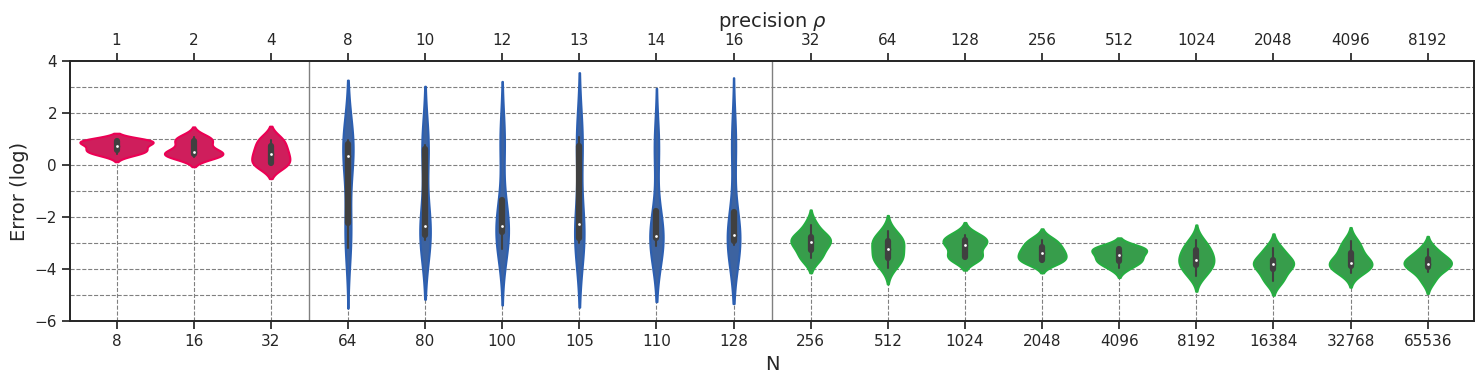

In [6]:
#sns.set_style("whitegrid")
df_summary['err_log'] = np.log10(df_summary['err'])
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
# oko con width!
g = sns.violinplot(data=df_summary, x = 'N', y = 'err_log', palette=my_palette, ax=ax, width=-.95)
#ax.grid(color='gray', linestyle='dashed')
#g.set(yscale="log")
#ax.set_facecolor('white') 
ax.set_xlabel(r'N', fontsize=14)
ax.set_ylabel(r'Error (log)', fontsize=14)

ax.axhline(0, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(1, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(2, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(3, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-1, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-2, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-3, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-4, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-5, linestyle='--', color='grey',lw=0.8, zorder=-1)



ax.axvline(2.5, linestyle='-', color='grey',lw=1, zorder=-1)
ax.axvline(8.5, linestyle='-', color='grey',lw=1, zorder=-1)

#plt.grid(axis='x')

# vertical plots
plt.plot([0,0], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([1,1], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([2,2], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)

for i in range(3, 18):
    plt.plot([i,i], [-6,-3],color='grey',linestyle='--', lw=0.8,zorder=-1)
    
plt.ylim(-6,4)
plt.xlim(-.6,17.6)
ax2 = ax.twiny()

new_tick_locations = np.arange(np.array(N_list).shape[0])
precision_list = np.array(precision_list)

def tick_function(X):    
    return ["%.0f" % z for z in X]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(precision_list))
ax2.set_xlabel(r"precision $\rho$", fontsize=14)


Nviolin = 18
for i in range(18):
    g.collections[2 * i].set_edgecolor(my_palette[i])
    
plt.tight_layout()
plt.savefig('plots/transientLaplacelr4.pdf')

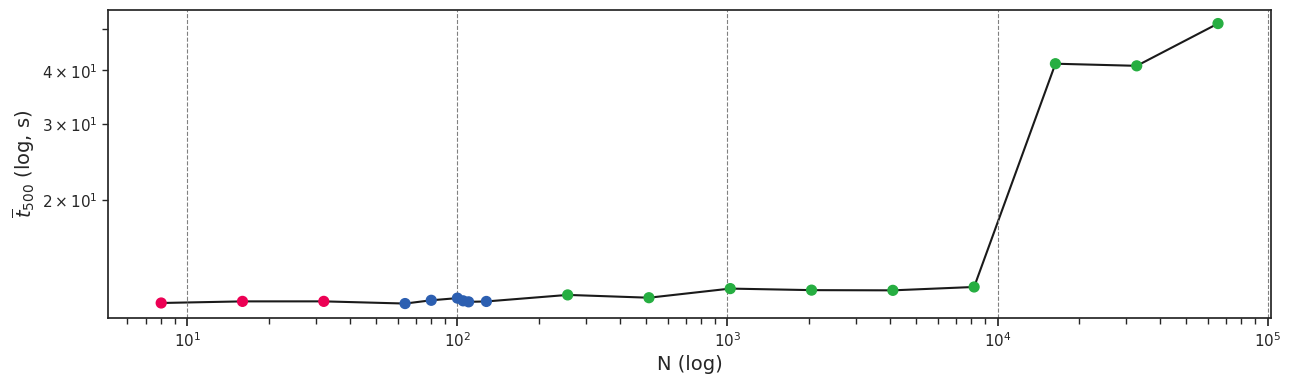

In [7]:
#sns.set_style("whitegrid")
df_summary['err_log'] = np.log10(df_summary['err'])
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
# oko con width!

values = pd.DataFrame(df.groupby(['N'])['times'].mean() * 2)
values['N'] = values.index


df['times_1000epoch'] = df['times'] * 2

#g = sns.pointplot(data=df[df.iteration >= 2000], x = 'N', y = 'times', palette=my_palette, ax=ax, width=-.95)

plt.scatter(values['N'], values['times'], c = my_palette, zorder =4, s=50)
plt.plot(values['N'], values['times'], 'k', linestyle = '-', zorder = 0)



#ax.set_yscale('log')
#ax.set_xscale('log')

ax.set(xscale='log')
ax.set(yscale='log')
ax.set_xlabel(r'N (log)', fontsize=14)
ax.set_ylabel(r'$\overline{t}_{500}$ (log, s)', fontsize=14)

plt.grid(linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(5, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(1, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(2, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(3, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-1, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-2, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-3, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-4, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-5, linestyle='--', color='grey',lw=0.8, zorder=-1)

#n = values['times'].values.astype(int).astype(str) 

#xloc_list = [8.0,16.0,32.0,60.0,75.0,90.0,100,110.0,128.0,236.0,470.0,950,1850,3700,7000.0,14000.0,28768.0]
#yloc_list = [6.470581667152483, 6.752715336940273, 7.140009445360884, 7.92274945293803, 8.266366335976779, 8.502028348369569, 8.696037136408977, 8.734937427156583, 9.198750655135003, 12.023865139875106, 17.45820187577387, 29.28706558389453, 39.533431020033795, 71.66072497303347, 137.83295140043808, 350, 557.0283445533819]
#for i, txt in enumerate(n):
#    xloc = xloc_list[i]
#    yloc = yloc_list[i]
#    plt.annotate(txt, (xloc, yloc), color = my_palette[i], fontsize=13)
    
#plt.ylim(0,1200)    
#plt.xlim(7, 40000)

#plt.savefig('times.pdf')


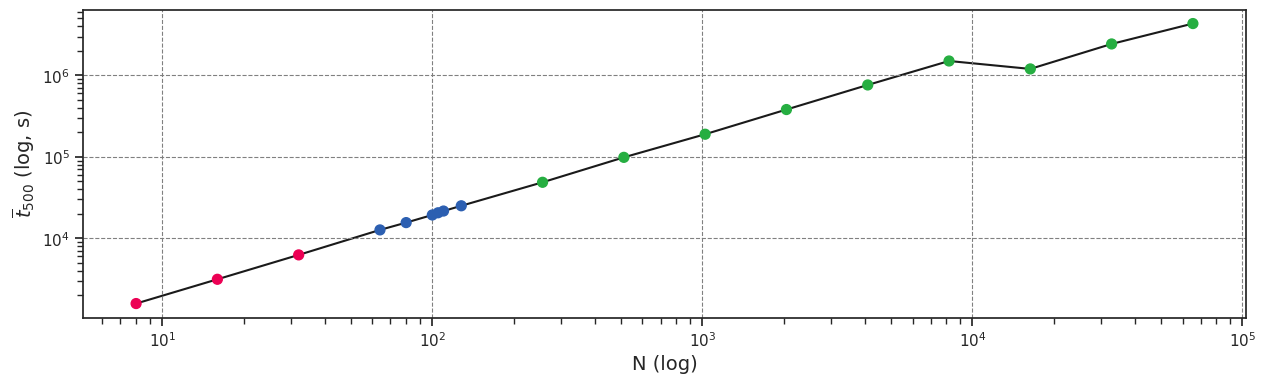

In [8]:
#sns.set_style("whitegrid")
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
# oko con width!

values = pd.DataFrame(df.groupby(['N'])['pointsec'].mean() * 2)
values['N'] = values.index


#g = sns.pointplot(data=df[df.iteration >= 2000], x = 'N', y = 'times', palette=my_palette, ax=ax, width=-.95)

plt.scatter(values['N'], values['pointsec'], c = my_palette, zorder =4, s=50)
plt.plot(values['N'], values['pointsec'], 'k', linestyle = '-', zorder = 0)


ax.set(xscale='log')
ax.set(yscale='log')
ax.set_xlabel(r'N (log)', fontsize=14)
ax.set_ylabel(r'$\overline{t}_{500}$ (log, s)', fontsize=14)

plt.grid(linestyle='--', color='grey',lw=0.8, zorder=-1)


(7.0, 40000.0)

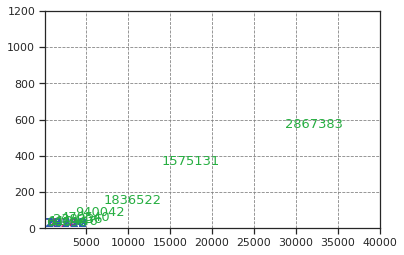

In [9]:

#ax.set_yscale('log')
#ax.set_xscale('log')

ax.set(xscale='log')
ax.set(yscale='log')
ax.set_xlabel(r'N (log)', fontsize=14)
ax.set_ylabel(r'$\overline{t}_{500}$ (log, s)', fontsize=14)

plt.grid(linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(5, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(1, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(2, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(3, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-1, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-2, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-3, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-4, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-5, linestyle='--', color='grey',lw=0.8, zorder=-1)

n = values['pointsec'].values.astype(int).astype(str) 

xloc_list = [8.0,16.0,32.0,60.0,75.0,90.0,100,110.0,128.0,236.0,470.0,950,1850,3700,7000.0,14000.0,28768.0]
yloc_list = [6.470581667152483, 6.752715336940273, 7.140009445360884, 7.92274945293803, 8.266366335976779, 8.502028348369569, 8.696037136408977, 8.734937427156583, 9.198750655135003, 12.023865139875106, 17.45820187577387, 29.28706558389453, 39.533431020033795, 71.66072497303347, 137.83295140043808, 350, 557.0283445533819]
for i, txt in enumerate(n):
    xloc = xloc_list[i]
    yloc = yloc_list[i]
    plt.annotate(txt, (xloc, yloc), color = my_palette[i], fontsize=13)
    
plt.ylim(0,1200)    
plt.xlim(7, 40000)

#plt.savefig('times.pdf')


41      0.147265
83      0.135323
205     0.023283
247     0.020890
451     0.033980
          ...   
5899    2.524200
5900    2.607770
5901    2.981659
5902    3.128334
5903    3.227832
Name: metrics, Length: 3586, dtype: float64

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


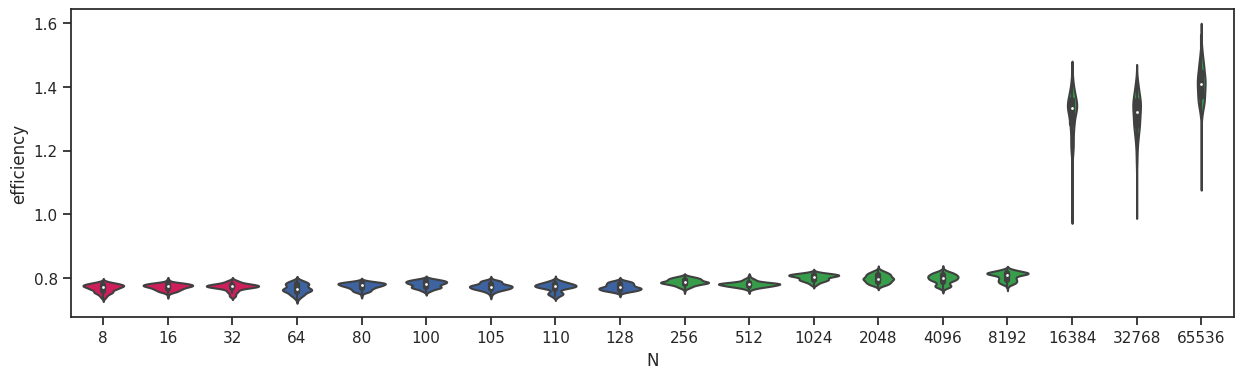

In [23]:
#sns.set_style("whitegrid")
df['efficiency'] = -np.log10(df['metrics'] / np.log10(df['times']))

df['efficiency'] = np.log10(df['times'])
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
g = sns.violinplot(data=df[df.iteration >= 2000], x = 'N', y = 'efficiency', palette=my_palette, ax=ax, width=-.95)

            err        texec   err_log     N_log
N                                               
8      5.729468   236.470762  0.716314  0.903090
16     5.270422   238.512975  0.631337  1.204120
32     3.918710   238.544308  0.440108  1.505150
64     3.381764   235.765464 -0.570787  1.806180
80     1.890358   239.911447 -1.359756  1.903090
100    2.241017   242.709406 -1.660997  2.000000
105    3.268135   239.218910 -1.309590  2.021189
110    1.270312   237.937331 -1.923250  2.041393
128    2.006895   238.425679 -1.915969  2.107210
256    0.001535   246.906904 -2.991246  2.408240
512    0.000900   243.230382 -3.242852  2.709270
1024   0.000941   255.383325 -3.141092  3.010300
2048   0.000567   253.286386 -3.348770  3.311330
4096   0.000388   253.004643 -3.483140  3.612360
8192   0.000398   257.599534 -3.592761  3.913390
16384  0.000217   849.313009 -3.827785  4.214420
32768  0.000351   839.753257 -3.632598  4.515450
65536  0.000213  1052.587230 -3.798016  4.816480


/tmp/ipykernel_11/1641092623.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summ = df_summary.groupby('N').mean()


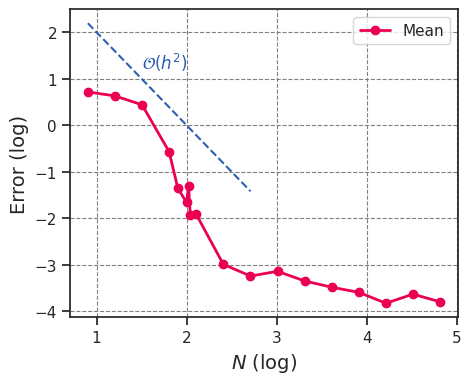

In [9]:
df_summary['N_log'] = np.log10(df_summary['N'].astype(int))

summ = df_summary.groupby('N').mean()
print(summ)
x = summ['N_log']
y = summ['err_log']

f, ax = plt.subplots(1,1, figsize=(5,4))

plt.plot(x,y, 'o-', color = pink, markerfacecolor=pink,lw=2, label = r'Mean')

ax.set_xlabel(r'$N$ (log)', fontsize=14)
ax.set_ylabel(r'Error (log)', fontsize=14)

plt.grid(color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.legend()

plt.plot(x[:11], 4 - 2* x[:11], color = blue, linestyle='--')
plt.text(1.5,1.2, r'$\mathcal{O}(h^2)$', color=blue)
plt.savefig('convLaplace.pdf')

            err       texec   err_log     N_log
N                                              
8      6.558282  208.768225  0.732226  0.903090
16     7.457777  212.015390  0.848975  1.204120
32     6.071786  209.699357  0.711422  1.505150
64     3.419381  210.079193  0.191531  1.806180
80     0.976088  209.558859 -1.837984  1.903090
100    2.464841  208.448249 -1.324172  2.000000
105    1.751534  214.438461 -1.304648  2.021189
110    0.734176  208.740550 -2.228407  2.041393
128    0.451519  211.364376 -2.408228  2.107210
256    0.000399  210.872020 -3.424906  2.408240
512    0.000558  215.547236 -3.325840  2.709270
1024   0.001042  216.309269 -3.026759  3.010300
2048   0.000727  218.708373 -3.275238  3.311330
4096   0.000343  219.122901 -3.630234  3.612360
8192   0.000259  226.197820 -3.670068  3.913390
16384  0.000277  743.969620 -3.668659  4.214420
32768  0.000209  852.865087 -3.765362  4.515450


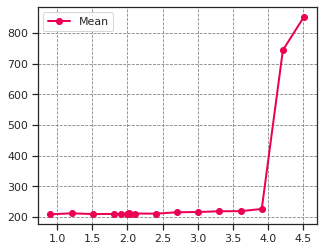

In [12]:
df_summary['N_log'] = np.log10(df_summary['N'].astype(int))

summ = df_summary.groupby('N').mean()
print(summ)
x = summ['N_log']
y = summ['texec']


#fig, ax = plt.figure(figsize=(5,4))
f, ax = plt.subplots(1,1, figsize=(5,4))

plt.plot(x,y, 'o-', color = pink, markerfacecolor=pink,lw=2, label = r'Mean')

#ax.set_xlabel(r'$N$ (log)', fontsize=14)
#ax.set_ylabel(r'Error (log)', fontsize=14)

plt.grid(color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.legend()

#plt.plot(x[:11], 4 - 2* x[:11], color = blue, linestyle='--')
#plt.text(1.5,1.2, r'$\mathcal{O}(h^2)$', color=blue)
#plt.savefig('convLaplace.pdf')

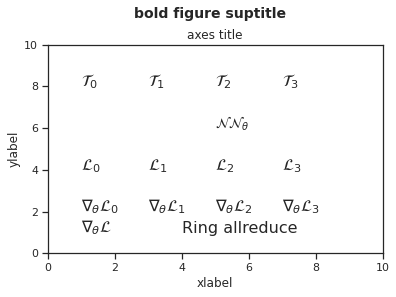

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fsize = 16

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(1,8,r'$\mathcal{T}_0$', fontsize=fsize)
ax.text(3,8,r'$\mathcal{T}_1$', fontsize=fsize)
ax.text(5,8,r'$\mathcal{T}_2$', fontsize=fsize)
ax.text(7,8,r'$\mathcal{T}_3$', fontsize=fsize)

ax.text(5,6,r'$\mathcal{N}\mathcal{N}_\theta$', fontsize=14)

ax.text(1,4,r'$\mathcal{L}_0$', fontsize=fsize)
ax.text(3,4,r'$\mathcal{L}_1$', fontsize=fsize)
ax.text(5,4,r'$\mathcal{L}_2$', fontsize=fsize)
ax.text(7,4,r'$\mathcal{L}_3$', fontsize=fsize)

ax.text(1,2,r'$\nabla_\theta\mathcal{L}_0$', fontsize=fsize)
ax.text(3,2,r'$\nabla_\theta\mathcal{L}_1$', fontsize=fsize)
ax.text(5,2,r'$\nabla_\theta\mathcal{L}_2$', fontsize=fsize)
ax.text(7,2,r'$\nabla_\theta\mathcal{L}_3$', fontsize=fsize)


ax.text(1,1,r'$\nabla_\theta\mathcal{L}$', fontsize=fsize)

ax.text(4,1,r'Ring allreduce', fontsize=fsize)
#plt.show()

plt.savefig('plots/export-symbols.svg')
